*Lab 6*

Confidence intervals 

Problem 1
We will start off by making a poisson background with a mean of 100 so that we can then inject data into it

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import seaborn as sb
import pandas as pd
from scipy import stats

plt.rcParams["figure.figsize"] = (15,5)

<function matplotlib.pyplot.show(*args, **kw)>

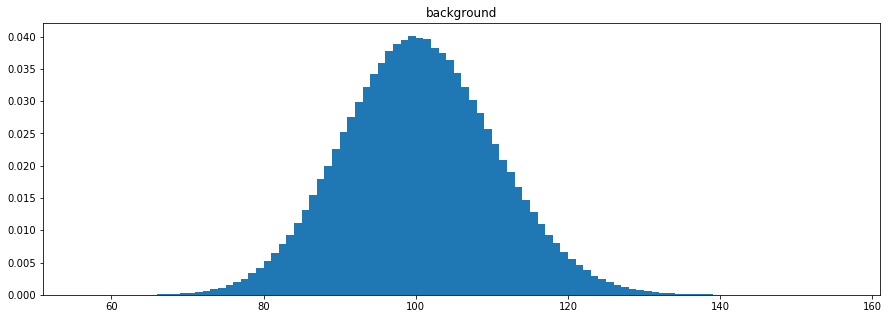

In [7]:
bkgd=scipy.stats.poisson.rvs(100, loc=0, size=1000000)
plt.hist(bkgd, density=True,bins=100)
#plt.yscale('log')
#plt.xlabel('Number of successes')
#plt.ylabel('Probability')
plt.title('background')
#plt.legend()
plt.show

In [8]:
p = stats.norm.cdf(5)

print('We get a five sigma sensitivity threshold at a signal strength of {0:1.0f} for this background'.format(stats.poisson.ppf(p,100)))

We get a five sigma sensitivity threshold at a signal strength of 154 for this background


Problem 2

We will inject a signal of 190 into the backgound

In [19]:
p = stats.norm.cdf(9)
stats.poisson.ppf(p,100)

inf

In [22]:
data1 = bkgd + 190.0

<function matplotlib.pyplot.show(*args, **kw)>

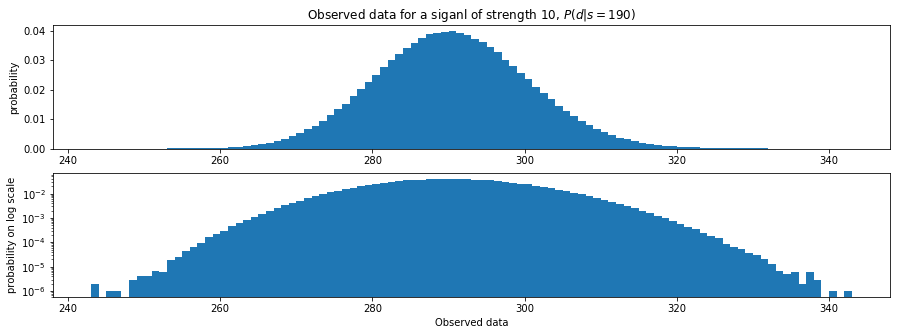

In [23]:

#plt.hist(data, bins=100)
plt.show
plt.subplot(211)
plt.ylabel('probability')
plt.title('Observed data for a siganl of strength 10, $P(d|s=190)$')
#plt.xlabel('Observed data', fontsize = 10)


#plt.hist(data1, bins=100)
plt.hist(data1,density=True, bins=100)
plt.subplot(212)
plt.ylabel('probability on log scale')
#plt.hist(data1, bins=100)
plt.hist(data1,density=True, bins=100)
plt.yscale('log')
plt.xlabel('Observed data', fontsize = 10)
plt.show

a)	this graph is telling us what we would expect to see if we were to collect only true data of strength 154. The probability distribution of the observed data is Poisson distributed and that is because the background shifts the value the true signal  

b) The signal is biased since the background is poison it has a slight asymmetry with the tail on the right being a bit bigger. It is also biased by being shifted over by 100 to the right on average, making the observed data stronger than the true signalon avarge.


*Problem 3*

a) Now we will look at a suite of injections. We will be injecting random signals from 0-200 so that we are getting plenty of signal which is well above the 5 sigma of the background. And then plot on a 2D histogram what what an observed signal would be at each value of a true signal

In [10]:
bkgd=scipy.stats.poisson.rvs(100, loc=0, size=1000000)
signal=np.random.uniform(low=0.0, high=200, size=(1000000))
data = bkgd + signal

In [11]:
bkgd=scipy.stats.poisson.rvs(100, loc=0, size=1000000)
signal=np.random.uniform(low=0.0, high=200, size=(1000000))
data = bkgd + signal
#plt.hist(data,density=True, bins=100)
#plt.yscale('log')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [12]:
singaledges = np.linspace(0,200,200)
dataeges = np.linspace(0,340,340)

datacenters = (dataeges[:-1]+dataeges[1:])/2
signalcenters = (singaledges[:-1]+singaledges[1:])/2

In [13]:
Psd, temp, temp2 =np.histogram2d(data,signal,bins=[dataeges,singaledges],density=True)

Text(0.5, 0, 'Observed data, $P(d|s)$')

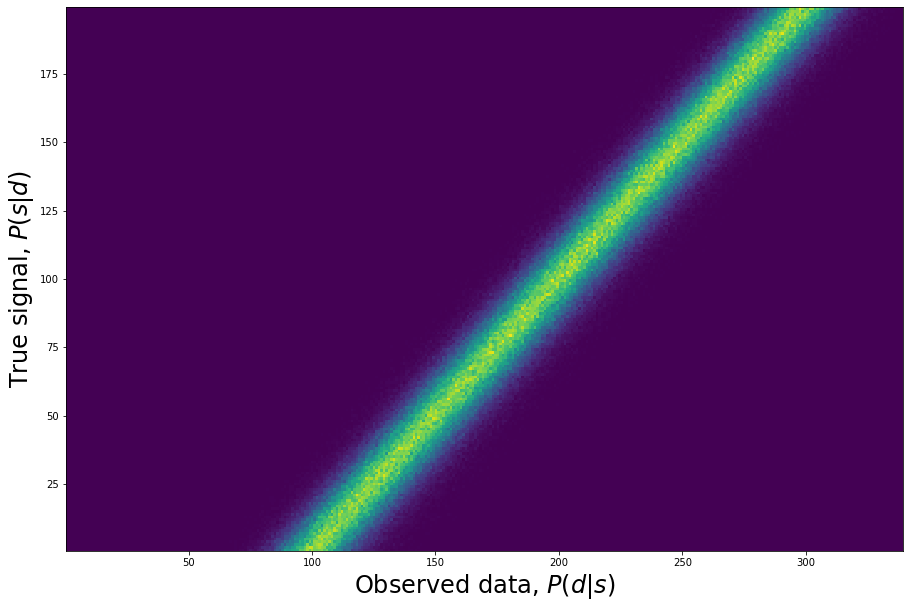

In [14]:
plt.rcParams["figure.figsize"] = (15,10)
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)


In [15]:
slices = pd.DataFrame(Psd)

b) We are taking a slice of the 2D graph at true signal of 190 and graphing what the probability distribution of the observed signal would be for a measurement of that true signal of 190. Here we also see that this is consistent with what we did before in part 2

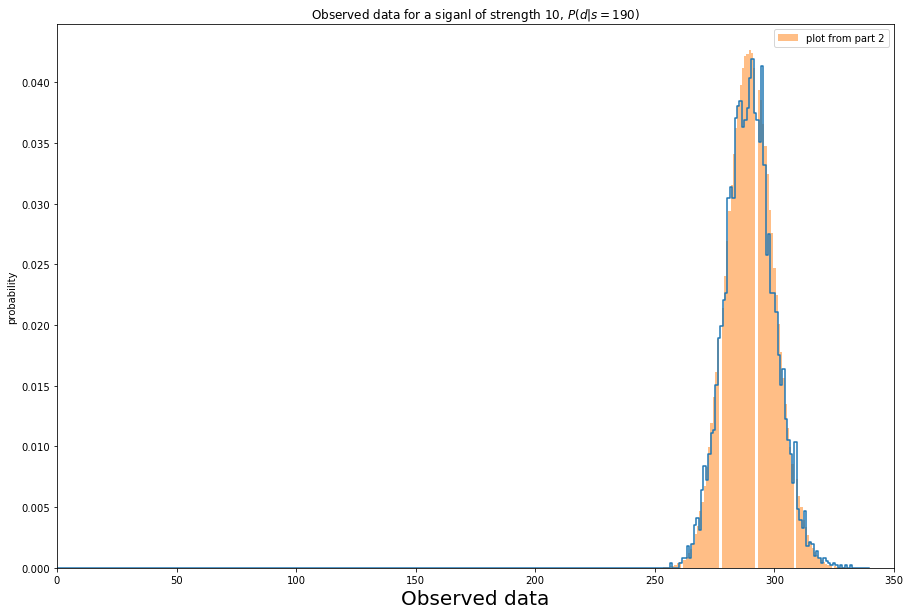

In [24]:
values=datacenters.round()
index=np.where(values ==  190.0)
norObsSig= slices[index[0][0]]/np.trapz(slices[index[0][0]])

plt.matplotlib.pyplot.step(datacenters,norObsSig)
temp[190]
plt.xlim([0,350])

plt.hist(data1, bins=100,alpha=0.5,density = True,label ='plot from part 2')
plt.xlim([0,350])
plt.show
plt.ylabel('probability')
plt.title('Observed data for a siganl of strength 10, $P(d|s=190)$')
plt.xlabel('Observed data', fontsize = 20)
datacenters[index[0][0]]
plt.legend()

Now we want to see what the probability distribution of true signal would be for a given observed data point, this is done by taking a vertical slice of the 2D graph. In other words, the graph below is showing the probability of different true signals giving us a measurement of strength of 200

In [17]:
values=datacenters.round()
index=np.where(values ==  200.0)
#plt.plot(signalcenters,slices.loc[index[0][0]])
obsSig=slices.iloc[index[0][0]]
datacenters[index[0][0]]


200.0884955752212

199

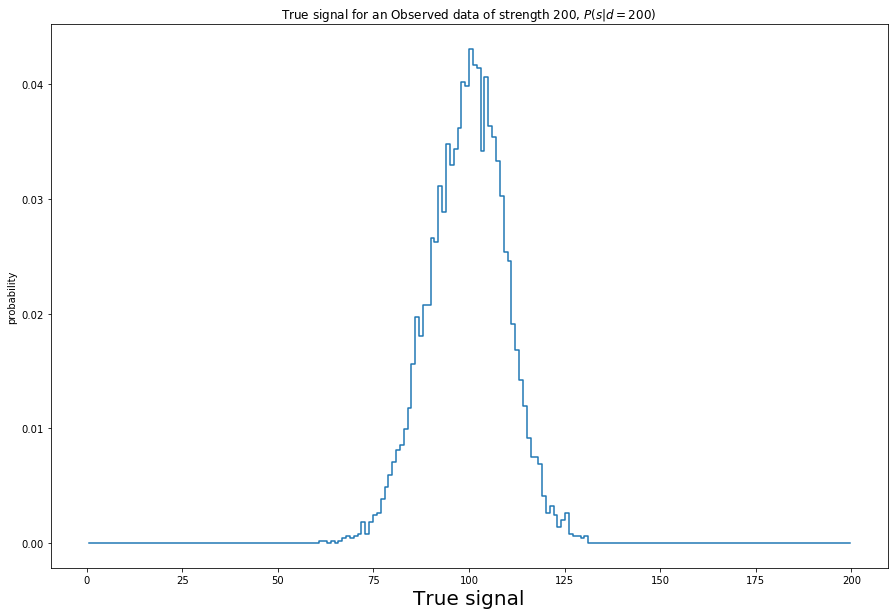

In [18]:
plt.matplotlib.pyplot.step(signalcenters,obsSig/np.trapz(obsSig))
plt.title('True signal for an Observed data of strength 200, $P(s|d=200)$')
plt.xlabel('True signal', fontsize = 20)
plt.ylabel('probability')
len(obsSig)

In [19]:
norObsSig= obsSig/np.trapz(obsSig)

In [100]:
p=stats.norm.cdf(1)
for i in range(norObsSig.size):
    I=np.trapz(norObsSig[:i])
    if I >= p:
        print(i)
        print(I)
        print(p)
        break
        
p=stats.norm.cdf(-1)
for i in range(norObsSig.size):
    I=np.trapz(norObsSig[:i])
    if I >= p:
        print(i)
        print(I)
        print(p)
        break
p=0.5
for i in range(norObsSig.size):
    I=np.trapz(norObsSig[:i])
    if I >= p:
        print(i)
        print(I)
        print(p)
        break

111
0.8608565737051792
0.8413447460685429
91
0.17181274900398413
0.15865525393145707
101
0.5181274900398407
0.5


d) For an observed signal of 200 we have true signal of strength 101 $\pm$10


e) Now since we have a Poisson distributed background that has a large mean (100) it is practically a Gaussian except for behavior at the tails and since we are just looking at values up to one sigma away from the mean making it practically a Gaussian and hence we have a symmetric uncertainty. Since the background is a Poisson with a mean of 100 then the signal has been biased by that. The observed signal is shifted to the right by about 100 from the true signal due to the background.